<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%AF%B8%EB%8B%88%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EB%A0%88%EC%8A%A4%ED%86%A0%EB%9E%91/%EB%A0%88%EC%8A%A4%ED%86%A0%EB%9E%91_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 읽어들이기

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/AI 스쿨 파일/데이터 분석/chipotle.tsv", sep="\t")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## 데이터 전처리

In [ ]:
df.isnull().sum()
df.drop('choice_description', axis=1, inplace=True)
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'] = pd.to_numeric(df['item_price'])

## 1. 가장 인기있는 메뉴 top10

In [ ]:
import pandas as pd

df = pd.read_csv("수업자료/csv/chipotle.tsv", sep="\t")
df.info()
df.isnull().sum()
df.head()
df.drop('choice_description', axis=1, inplace=True)
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'] = pd.to_numeric(df['item_price'])

df1 = df.groupby('item_name').sum()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity,item_price
item_name,,,
6 Pack Soft Drink,52322,55,356.95
Barbacoa Bowl,53972,66,672.36
Barbacoa Burrito,74718,91,894.75
Barbacoa Crispy Tacos,5613,12,120.21
Barbacoa Salad Bowl,9708,10,106.40
Barbacoa Soft Tacos,18725,25,250.46
Bottled Water,175944,211,302.56
Bowl,472,4,29.60
Burrito,1550,6,44.40


Text(0, 0.5, '메뉴명')

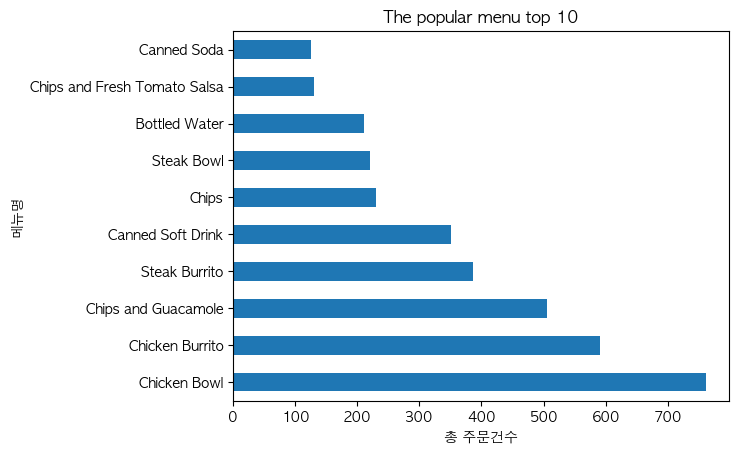

In [ ]:
df1['quantity'].nlargest(10).plot.barh()

import matplotlib.pyplot as plt
plt.title('The popular menu top 10')
plt.rc('font', family='AppleGothic')
plt.xlabel('총 주문건수')
plt.ylabel('메뉴명')

## 2. 가장 매출이 높은 메뉴 Top10

In [ ]:
import pandas as pd

df = pd.read_csv("수업자료/csv/chipotle.tsv", sep="\t")
df.info()
df.isnull().sum()
df.head()
df.drop('choice_description', axis=1, inplace=True)
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'] = pd.to_numeric(df['item_price'])

df1 = df.groupby('item_name').sum()
df1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity,item_price
item_name,,,
6 Pack Soft Drink,52322,55,356.95
Barbacoa Bowl,53972,66,672.36
Barbacoa Burrito,74718,91,894.75
Barbacoa Crispy Tacos,5613,12,120.21
Barbacoa Salad Bowl,9708,10,106.40


Text(0, 0.5, '메뉴명')

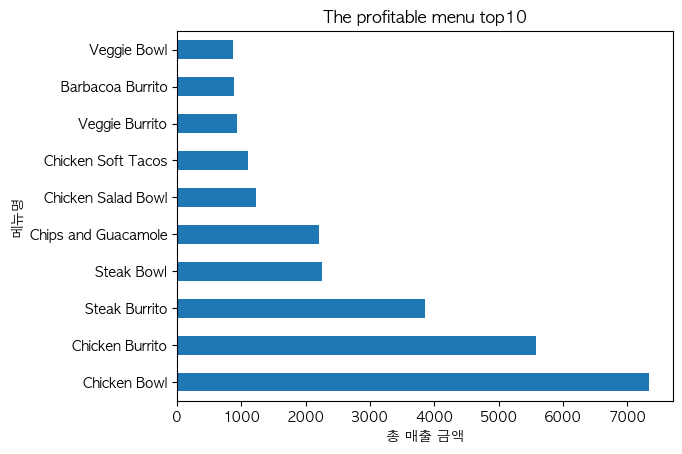

In [ ]:

df1['item_price'].nlargest(10).plot.barh()
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.title('The profitable menu top10')
plt.xlabel('총 매출 금액')
plt.ylabel('메뉴명')

## 3. 메뉴의 인기(주문수)와 총 매출 사이의 상관관계

In [ ]:
import pandas as pd

df = pd.read_csv("수업자료/csv/chipotle.tsv", sep="\t")
df.info()
df.isnull().sum()
df.head()
df.drop('choice_description', axis=1, inplace=True)
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'] = pd.to_numeric(df['item_price'])

df1 = df.groupby('item_name').sum()
df1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity,item_price
item_name,,,
6 Pack Soft Drink,52322,55,356.95
Barbacoa Bowl,53972,66,672.36
Barbacoa Burrito,74718,91,894.75
Barbacoa Crispy Tacos,5613,12,120.21
Barbacoa Salad Bowl,9708,10,106.40


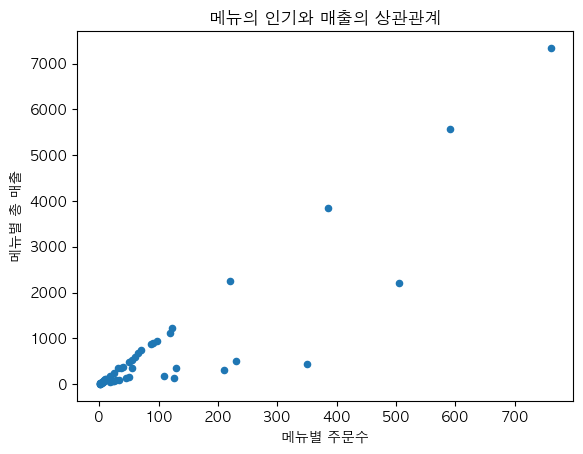

,quantity,item_price
quantity,1.000000,0.902719
item_price,0.902719,1.000000


In [ ]:

df1.plot(x= 'quantity', y= 'item_price', kind='scatter')
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.title('메뉴의 인기와 매출의 상관관계')
plt.xlabel('메뉴별 주문수')
plt.ylabel('메뉴별 총 매출')
plt.show()


df1[['quantity', 'item_price']].corr()

## 4. 주문별 매출액

In [ ]:
import pandas as pd

df = pd.read_csv("수업자료/csv/chipotle.tsv", sep="\t")
df.info()
df.isnull().sum()
df.head()
df.drop('choice_description', axis=1, inplace=True)
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'] = pd.to_numeric(df['item_price'])

df2 = df.groupby('order_id').sum()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,quantity,item_name,item_price
order_id,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,11.56
2,2,Chicken Bowl,16.98
3,2,Chicken BowlSide of Chips,12.67
4,2,Steak BurritoSteak Soft Tacos,21.00
5,2,Steak BurritoChips and Guacamole,13.70


Text(0, 0.5, '매출액')

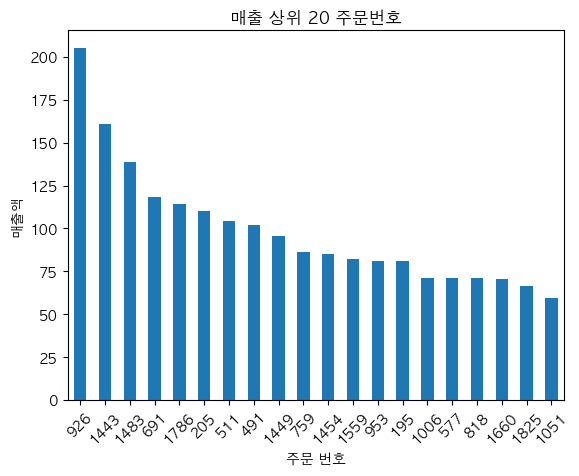

In [ ]:
df2['item_price'].nlargest(20).plot.bar(rot=45)

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.title('매출 상위 20 주문번호')
plt.xlabel('주문 번호')
plt.ylabel('매출액')

Text(0.5, 1.0, '주문당 매출액 분포')

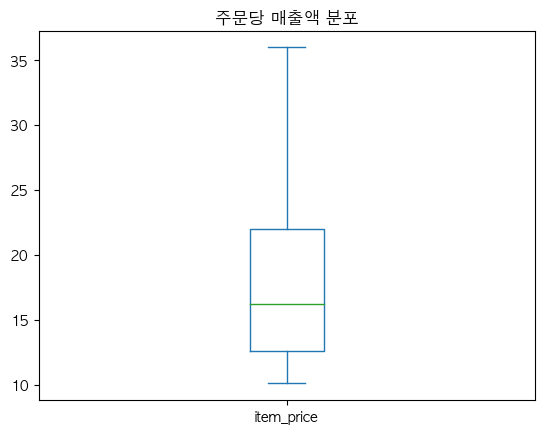

In [ ]:
df2['item_price'].plot.box(showfliers=False)

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.title('주문당 매출액 분포')

<Axes: xlabel='order_id'>

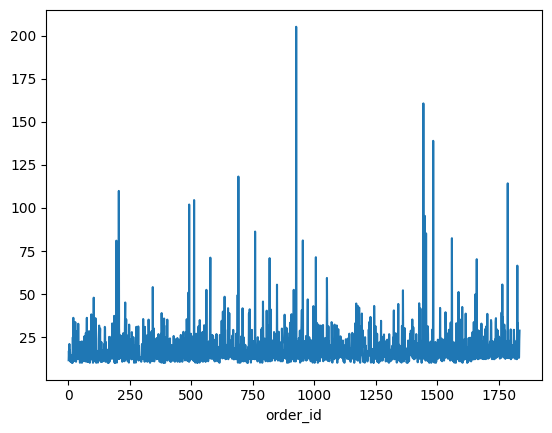

In [ ]:
df2['item_price'].plot.line()

## 5. 주문 당 주문 메뉴 개수

In [ ]:
import pandas as pd

df = pd.read_csv("수업자료/csv/chipotle.tsv", sep="\t")
df.info()
df.isnull().sum()
df.head()
df.drop('choice_description', axis=1, inplace=True)
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'] = pd.to_numeric(df['item_price'])

df2 = df.groupby('order_id').sum()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,quantity,item_name,item_price
order_id,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,11.56
2,2,Chicken Bowl,16.98
3,2,Chicken BowlSide of Chips,12.67
4,2,Steak BurritoSteak Soft Tacos,21.00
5,2,Steak BurritoChips and Guacamole,13.70


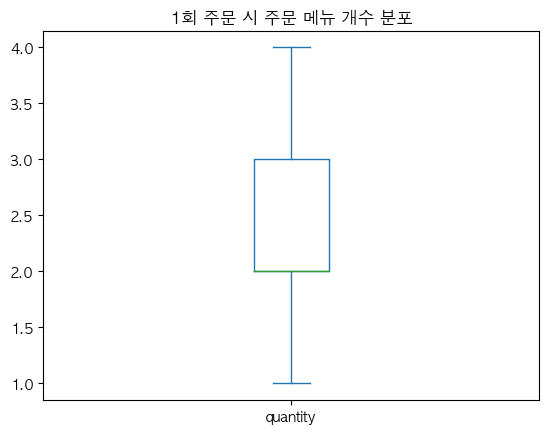

In [ ]:
df2['quantity'].plot.box(showfliers=False)
# df2['quantity'].plot.box()
# df3.plot.box()

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.title('1회 주문 시 주문 메뉴 개수 분포')
plt.rc('font', family='AppleGothic')

Text(0.5, 1.0, '1회 주문 시 주문 메뉴 개수')

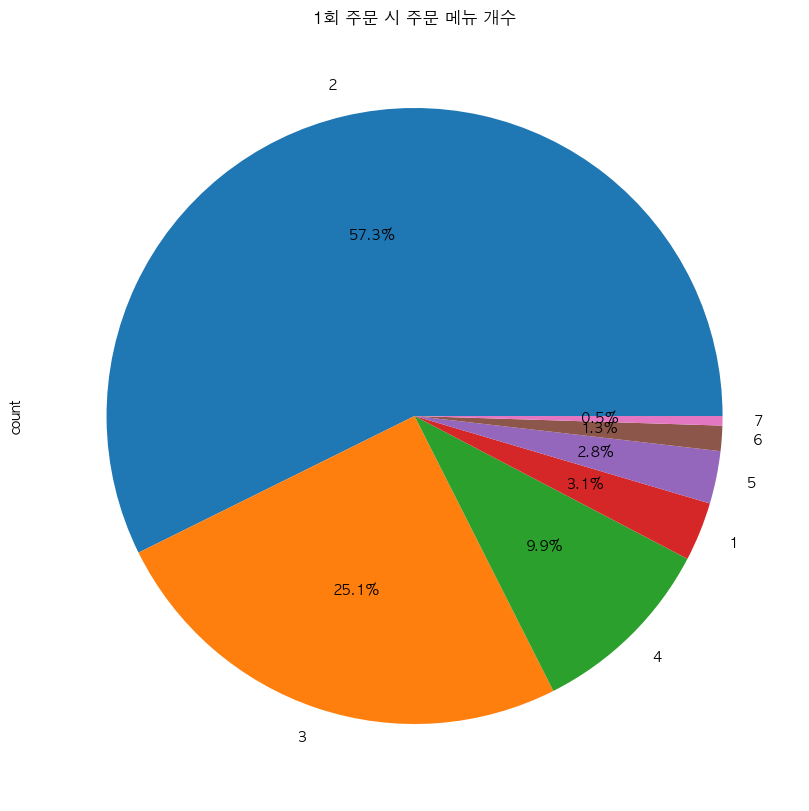

In [ ]:
df3 = df2.value_counts('quantity')
# # df3와 df4는 유사(행 순서만 다름)
# df4 = df2.groupby('quantity').size()
df3.head()


df3.nlargest(7).plot.pie(autopct='%.1f%%', figsize=(10,10))

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.title('1회 주문 시 주문 메뉴 개수')